# Intro
#Author: Fatemeh Salehi
Email: fatemeh.salehihafshejni@fau.de

Model Training and Evaluation Notebook
Paper: Machine Learning Prediction of Treatment Response to Biological Disease-Modifying Antirheumatic Drugs in Rheumatoid Arthritis


"""

# libraries

In [1]:
# Load libraries
from pandas import read_csv
from pandas.plotting import scatter_matrix
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
import csv
import datetime
import datetime as dt
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import roc_auc_score
from sklearn.calibration import calibration_curve, CalibrationDisplay
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.metrics import mean_squared_error
from sklearn.impute import SimpleImputer
from utils import *
import torch
import wget
from sklearn.model_selection import KFold
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.ensemble import AdaBoostClassifier
import shap
import matplotlib.pyplot as plt
import shap
# manual nested cross-validation for random forest on a classification dataset
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import sklearn.metrics as metrics
from sklearn.model_selection import cross_validate
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.calibration import calibration_curve
from sklearn.metrics import brier_score_loss
from xgboost import XGBClassifier
from sklearn.metrics import roc_curve, auc

#matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import matplotlib.transforms as mtransforms

import warnings


pd.set_option ('display.max_columns' , None)
pd.set_option ('display.max_columns' , 100)



/Users/fatemehsalehi/opt/anaconda3/envs/RAproject/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# Data Exploring

In [2]:
df =pd.read_csv('data_bdmards.csv')
print(df)

     index   tptID  Age_years  Gender  Osteoarthritis  Asthma  Uveitis  \
0       52     7.0       46.0     0.0             0.0     0.0      0.0   
1       87    21.0       60.0     1.0             0.0     0.0      0.0   
2      168   124.0       73.0     0.0             0.0     0.0      0.0   
3      211   159.0       81.0     0.0             0.0     0.0      0.0   
4      224   160.0       67.0     1.0             0.0     0.0      0.0   
..     ...     ...        ...     ...             ...     ...      ...   
149   7819  4455.0       66.0     0.0             0.0     0.0      0.0   
150   7833  4470.0       23.0     1.0             0.0     0.0      0.0   
151   7846  4683.0       34.0     1.0             0.0     0.0      0.0   
152   7858  4729.0       36.0     1.0             0.0     0.0      0.0   
153   7868  5399.0       54.0     1.0             0.0     0.0      0.0   

     Hypertension  Chronic_renal_insufficiency  COPD  Depression  Diabetes  \
0             0.0                

In [ ]:
# class distribution
dataset= df.copy()
print(dataset.groupby('effectiveness').size())
print(dataset.groupby('sustained').size())


# Classification

In [5]:
# manual nested cross-validation for random forest on a classification dataset
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import sklearn.metrics as metrics
from sklearn.model_selection import cross_validate
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.calibration import calibration_curve
from sklearn.metrics import brier_score_loss

#matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import matplotlib.transforms as mtransforms

In [7]:
import pandas as pd
from scipy.stats import ttest_ind, chi2_contingency

dataset = pd.DataFrame(df)

# Create groups based on response
responders_6_months = dataset[dataset['effectiveness'] == 1]
non_responders_6_months = dataset[dataset['effectiveness'] == 0]

# List of continuous and categorical features
continuous_features = ['Age_years']
categorical_features = ['Gender', 'Osteoarthritis', 'Hypertension', 'Diabetes', 'bDMARD']

# Function to calculate p-values for continuous features
def calculate_p_values_continuous(feature):
    stat, p = ttest_ind(responders_6_months[feature], non_responders_6_months[feature], nan_policy='omit')
    return p

# Function to calculate p-values for categorical features
def calculate_p_values_categorical(feature):
    table = pd.crosstab(dataset['effectiveness'], dataset[feature])
    stat, p, dof, expected = chi2_contingency(table)
    return p

# Calculate p-values
p_values_continuous = {feature: calculate_p_values_continuous(feature) for feature in continuous_features}
p_values_categorical = {feature: calculate_p_values_categorical(feature) for feature in categorical_features}

# Display p-values
print("P-values for Continuous Features:")
for feature, p in p_values_continuous.items():
    print(f"{feature}: {p}")

print("\nP-values for Categorical Features:")
for feature, p in p_values_categorical.items():
    print(f"{feature}: {p}")

# Include bDMARD type and ethnicity in the table
table_columns = continuous_features + categorical_features
table_data = dataset[table_columns]

# Save the table to a CSV file (or any other format as required)
#table_data.to_csv('clinical_features_with_p_values.csv', index=False)

#print("Table has been saved to clinical_features_with_p_values.csv")


P-values for Continuous Features:
Age_years: 0.04695661951613494

P-values for Categorical Features:
Gender: 0.07262569056510335
Osteoarthritis: 1.0
Hypertension: 1.0
Diabetes: 1.0
bDMARD: 1.0


Effectiveness Classification

In [8]:
data_classifier=pd.DataFrame(columns=['Classifier','Accuracy','AUC-ROC','F1 score', 'MCC'])


In [9]:
def predict_proba(self, X):
        """Min-max scale output of `decision_function` to [0,1]."""
        df = self.decision_function(X)
        calibrated_df = (df - df_min_) / (df_max_ -df_min_)
        proba_pos_class = np.clip(calibrated_df, 0, 1)
        proba_neg_class = 1 - proba_pos_class
        proba = np.c_[proba_neg_class, proba_pos_class]
        return proba

# ADAboost

>acc=0.903, est=0.862, cfg={'learning_rate': 1e-15, 'n_estimators': 1}
>acc=0.903, est=0.829, cfg={'learning_rate': 1e-15, 'n_estimators': 1}
>acc=0.871, est=0.870, cfg={'learning_rate': 1e-15, 'n_estimators': 1}
>acc=0.742, est=0.902, cfg={'learning_rate': 1e-15, 'n_estimators': 1}
>acc=0.833, est=0.822, cfg={'learning_rate': 1e-15, 'n_estimators': 1}
Accuracy: 0.851 (0.060)
Precision: 0.893 (0.068)
F1_Score: 0.876 (0.065)
Recall: 0.863 (0.083)
MCC: 0.686 (0.114)
AUC_ROC: 0.845 (0.064)


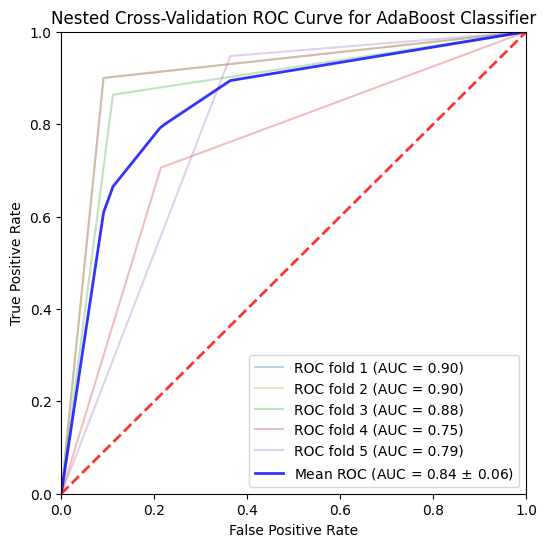

In [11]:
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold, GridSearchCV, cross_val_score
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_curve, auc, accuracy_score, precision_score, recall_score, f1_score, matthews_corrcoef
from sklearn.metrics import matthews_corrcoef


# Ignore all FutureWarnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Define your target columns and prepare the dataset
target = ['effectiveness', 'remission', 'sustained']
X = dataset.loc[:, ~dataset.columns.isin(target)].drop(['tptID', 'index', 'Uveitis', 'bDMARD_intake_duration_days', 'DateDiff_NM'], axis=1)
y_effect = dataset.loc[:, 'effectiveness']
y = y_effect.to_numpy()
X = X.to_numpy()

# Configure the cross-validation procedure
cv_outer = KFold(n_splits=5, shuffle=True, random_state=1)

# Define the random forest classifier
rfc = RandomForestClassifier(n_estimators=100, random_state=42)

# Initialize lists to store results
acc_results_ada = []
precision_results_ada = []
F1_results_ada = []
recall_results_ada = []
mcc_results_ada = []
aucroc_results_ada = []
conf_matrix_results = []
aucs_ada = []
y_prob_all_ADA = []
selected_features_list = []
best_params_list = []
shap_values_list = []
SHAP_values_per_fold = []
cross_val_scores_list = []
ada_kfold_probability = []
kfold_true_label_ada = []
y_prob = []

# Define the AdaBoost classifier with decision tree as base estimator
dtc = DecisionTreeClassifier(max_depth=1)

# Plotting setup
tprs = []
mean_fpr_ada = np.linspace(0, 1, 100)
fig, ax = plt.subplots(figsize=(6, 6))
fold = 0

for train_ix, test_ix in cv_outer.split(X, y):
    # Split data
    X_train, X_test = X[train_ix], X[test_ix]
    y_train, y_test = y[train_ix], y[test_ix]
    
    # Configure the cross-validation procedure
    cv_inner = KFold(n_splits=3, shuffle=True, random_state=1)
    fold += 1
    
    model_rfc = rfc.fit(X_train, y_train)
    feature_importances = rfc.feature_importances_
    selected_features = np.where(feature_importances > 0.01)[0]  # set a threshold for feature selection
    selected_features_list.append(selected_features)
    
    # Define the model with default hyperparameters
    model = AdaBoostClassifier()
    
    # Define the grid of values to search
    space = {
        'n_estimators': [1, 10, 50],
        'learning_rate': [1e-15, 1e-14, 1e-13, 1e-12, 1e-11, 1e-10, 1e-9, 1e-8, 1e-7]
    }
    
    # Subset the features in the training and test sets
    X_train_fs = X_train[:, selected_features]
    X_test_fs = X_test[:, selected_features]
    
    # Define search
    search = GridSearchCV(model, space, scoring='accuracy', cv=cv_inner, refit=True)
    scores = cross_val_score(search, X_train_fs, y_train, cv=cv_inner)
    cross_val_scores_list.append(scores.mean())
    
    result = search.fit(X_train_fs, y_train)
    best_params = result.best_params_
    best_params_list.append(best_params)
    
    # Get the best performing model fit on the whole training set
    best_model = result.best_estimator_
    
    # Evaluate model on the hold out dataset
    def predict_proba(model, X):
        """Min-max scale output of `decision_function` to [0,1]."""
        df = model.decision_function(X)
        calibrated_df = (df - df.min()) / (df.max() - df.min())
        proba_pos_class = np.clip(calibrated_df, 0, 1)
        proba_neg_class = 1 - proba_pos_class
        proba = np.c_[proba_neg_class, proba_pos_class]
        return proba
    
    probas_ADA = predict_proba(best_model, X_test_fs)[:, 1]
    y_pred_ada = best_model.predict_proba(X_test_fs)[:, 1]
    
    # Compute and plot ROC curve
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_ada)
    tprs.append(np.interp(mean_fpr_ada, fpr, tpr))
    roc_auc = auc(fpr, tpr)
    aucs_ada.append(roc_auc)
    plt.plot(fpr, tpr, lw=1.5, alpha=0.3, label='ROC fold %d (AUC = %0.2f)' % (fold, roc_auc))
    
    yhat = best_model.predict(X_test_fs)
    
    # Evaluate the model
    acc_ada = accuracy_score(y_test, yhat)
    precision_ada = precision_score(y_test, yhat)
    recall_ada = recall_score(y_test, yhat)
    f1_ada = f1_score(y_test, yhat)
    mcc_ada = matthews_corrcoef(y_test, yhat)
    
    auc_ADA = auc(fpr, tpr)
    
    # Store the result
    acc_results_ada.append(acc_ada)
    precision_results_ada.append(precision_ada)
    F1_results_ada.append(f1_ada)
    recall_results_ada.append(recall_ada)
    mcc_results_ada.append(mcc_ada)
    aucroc_results_ada.append(auc_ADA)
    ada_kfold_probability.append(probas_ADA)
    kfold_true_label_ada.append(y_test)
    y_prob_all_ADA.append(yhat)
    
    # Report progress
    print('>acc=%.3f, est=%.3f, cfg=%s' % (acc_ada, result.best_score_, result.best_params_))

# Summarize the estimated performance of the model
print('Accuracy: %.3f (%.3f)' % (np.mean(acc_results_ada), np.std(acc_results_ada)))
print('Precision: %.3f (%.3f)' % (np.mean(precision_results_ada), np.std(precision_results_ada)))
print('F1_Score: %.3f (%.3f)' % (np.mean(F1_results_ada), np.std(F1_results_ada)))
print('Recall: %.3f (%.3f)' % (np.mean(recall_results_ada), np.std(recall_results_ada)))
print('MCC: %.3f (%.3f)' % (np.mean(mcc_results_ada), np.std(mcc_results_ada)))
print('AUC_ROC: %.3f (%.3f)' % (np.mean(aucs_ada), np.std(aucs_ada)))

# Plot the mean ROC curve across all folds
mean_tpr_ada = np.mean(tprs, axis=0)
mean_auc_ada = auc(mean_fpr_ada, mean_tpr_ada)
std_auc_ada = np.std(aucs_ada)
plt.plot(mean_fpr_ada, mean_tpr_ada, color='b', label=r"Mean ROC (AUC = %0.2f $\pm$ %0.2f)" % (mean_auc_ada, std_auc_ada), lw=2, alpha=.8)

# Plot the chance line
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r', alpha=.8)

# Finalize the plot
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Nested Cross-Validation ROC Curve for AdaBoost Classifier')
plt.legend(loc="lower right")
plt.savefig('roc_ada', dpi=300)

plt.show()

In [12]:
data_ada = pd.DataFrame(data=[['AdaBoost', '%.3f (%.3f)' % (mean(acc_results_ada), std(acc_results_ada)), 
                               '%.3f (%.3f)' % (mean(aucroc_results_ada), std(aucroc_results_ada)), 
                               '%.3f (%.3f)' % (mean(F1_results_ada), std(F1_results_ada)), 
                               '%.3f (%.3f)' % (mean(mcc_results_ada), std(mcc_results_ada))]], 
                        columns=['Classifier', 'Accuracy', 'AUC-ROC', 'F1 score', 'MCC'])

data_classifier = pd.concat([data_classifier, data_ada], ignore_index=True)

In [24]:
from sklearn.metrics import confusion_matrix
from math import sqrt
def calculate_mcc_from_confusion_matrix(y_true, y_pred):
    # Generate the confusion matrix
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    
    # Calculate MCC using the formula
    denominator = sqrt((tp + fp) * (tp + fn) * (tn + fp) * (tn + fn))
    if denominator == 0:
        return 0  # Return 0 if the denominator is 0 to avoid division by zero
    mcc = (tp * tn - fp * fn) / denominator
    return mcc
mcc_ada = calculate_mcc_from_confusion_matrix(y_test, yhat)
mcc_ada

0.6361072620956485

In [13]:
data_classifier

,Classifier,Accuracy,AUC-ROC,F1 score,MCC
0,AdaBoost,0.851 (0.060),0.845 (0.064),0.876 (0.065),0.686 (0.114)


In [18]:
#result_table_AUCROC = result_table_AUCROC.append({'classifiers':'AdaBoost',
                                        'fpr':mean_fpr_ada, 
                                        'tpr':mean_tpr_ada, 
                                        'auc':mean_auc_ada}, ignore_index=True)

IndentationError: unexpected indent (2990652344.py, line 2)

SVM

>acc=0.581, est=0.659, cfg={'C': 1000.0, 'gamma': 1e-06}
>acc=0.839, est=0.650, cfg={'C': 100.0, 'gamma': 1e-06}
>acc=0.581, est=0.675, cfg={'C': 100.0, 'gamma': 1e-06}
>acc=0.710, est=0.683, cfg={'C': 100.0, 'gamma': 1e-06}
>acc=0.533, est=0.662, cfg={'C': 10.0, 'gamma': 1e-05}
Accuracy: 0.649 (0.112)
Precision: 0.744 (0.094)
F1_Score: 0.717 (0.087)
Recall: 0.714 (0.147)
AUC_ROC: 0.772 (0.124)
MCC: 0.244 (0.268)


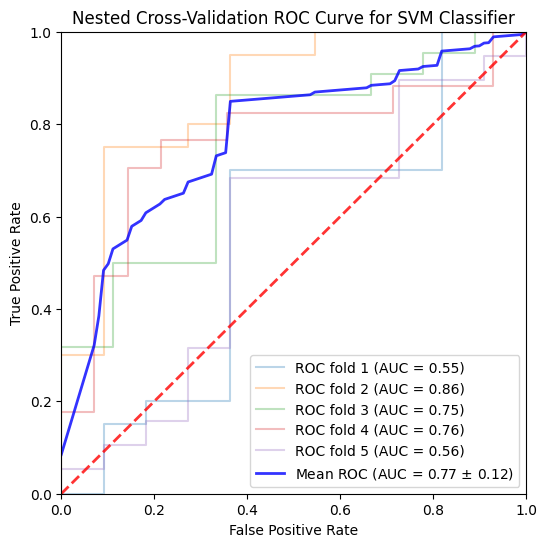

In [25]:
# Ignore all FutureWarnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Define your target columns and prepare the dataset
target = ['effectiveness', 'remission', 'sustained']
X = dataset.loc[:, ~dataset.columns.isin(target)].drop(['tptID', 'index', 'Uveitis', 'bDMARD_intake_duration_days', 'DateDiff_NM'], axis=1)
y_effect = dataset.loc[:, 'effectiveness']
y = y_effect.to_numpy()
X = X.to_numpy()
# configure the cross-validation procedure
cv_outer = KFold(n_splits=5, shuffle=True, random_state=1)

# enumerate splits
acc_results_s = list()
precision_results_s = list()
F1_results_s = list()
recall_results_s = list()
aucroc_results_s = list()
mcc_results_s = list()
aucs_s = list()

# store probability predictions and true labels here
fig, ax = plt.subplots(figsize=(6, 6))

y_prob_all_ADA = list()

selected_features_list = list()
best_params_list = list()
shap_values_list = list()
SHAP_values_per_fold = []
cross_val_scores_list = list()

# CALIBRATION
svm_kfold_probability = list()
kfold_true_label_svm = list()
y_prob = list()

fold = 0

mean_fpr_s = np.linspace(0, 1, 100)

for train_ix, test_ix in cv_outer.split(X):
    # split data
    X_train, X_test = X[train_ix], X[test_ix]
    y_train, y_test = y[train_ix], y[test_ix]
    fold += 1
    
    # configure the cross-validation procedure
    cv_inner = KFold(n_splits=3, shuffle=True, random_state=1)
    
    model_rfc = rfc.fit(X_train, y_train)
    feature_importances = rfc.feature_importances_
    selected_features = np.where(feature_importances > 0.01)[0] # set a threshold for feature selection
    selected_features_list.append(selected_features)
    
    # subset the features in the training and test sets
    X_train_fs = X_train[:, selected_features]
    X_test_fs = X_test[:, selected_features]
    
    # define the model with default hyperparameters
    param_grid = {'C': [1e-10, 1e-5, 1e-3, 1e-2, 0.1, 1, 1e1, 1e2, 1e3, 5e3, 1e4, 5e4, 1e5],
                  'gamma': [1e-6, 1e-5, 1e-4, 0.001, 0.005, 0.01, 0.1, 1, 10, 100]}
    
    # define search
    search_s = GridSearchCV(SVC(kernel='rbf', class_weight='balanced', probability=True), param_grid, scoring='accuracy', cv=cv_inner, refit=True)
    
    # execute the grid search
    result_s = search_s.fit(X_train_fs, y_train)
    best_model_s = result_s.best_estimator_
    
    # evaluate model on the hold out dataset
    probas_svc = best_model_s.predict_proba(X_test_fs)
    y_pred_s = best_model_s.predict_proba(X_test_fs)[:, 1]
    
    # Compute and plot ROC curve
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_s)
    tprs.append(np.interp(mean_fpr_s, fpr, tpr))
    roc_auc = auc(fpr, tpr)
    aucs_s.append(roc_auc)
    plt.plot(fpr, tpr, lw=1.5, alpha=0.3, label='ROC fold %d (AUC = %0.2f)' % (fold, roc_auc))
    
    yhat_s = best_model_s.predict(X_test_fs)
    
    # evaluate the model
    acc_s = accuracy_score(y_test, yhat_s)
    precision_s = precision_score(y_test, yhat_s)
    recall_s = recall_score(y_test, yhat_s)
    f1_s = f1_score(y_test, yhat_s)
    mcc_s = matthews_corrcoef(y_test, yhat_s)
    auc_s = metrics.roc_auc_score(y_test, probas_svc[:, 1])
    
    svm_kfold_probability.append(probas_svc[:, 1])
    kfold_true_label_svm.append(y_test)
    
    # store the result
    acc_results_s.append(acc_s)
    precision_results_s.append(precision_s)
    F1_results_s.append(f1_s)
    recall_results_s.append(recall_s)
    aucroc_results_s.append(auc_s)
    mcc_results_s.append(mcc_s)
    
    # report progress
    print('>acc=%.3f, est=%.3f, cfg=%s' % (acc_s, result_s.best_score_, result_s.best_params_))

# Plot the mean ROC curve across all folds
mean_tpr_s = np.mean(tprs, axis=0)
mean_auc_s = auc(mean_fpr_s, mean_tpr_s)
std_auc_s = np.std(aucs_s)

# summarize the estimated performance of the model
print('Accuracy: %.3f (%.3f)' % (mean(acc_results_s), std(acc_results_s)))
print('Precision: %.3f (%.3f)' % (mean(precision_results_s), std(precision_results_s)))
print('F1_Score: %.3f (%.3f)' % (mean(F1_results_s), std(F1_results_s)))
print('Recall: %.3f (%.3f)' % (mean(recall_results_s), std(recall_results_s)))
print('AUC_ROC: %.3f (%.3f)' % (mean_auc_s, std_auc_s))
print('MCC: %.3f (%.3f)' % (mean(mcc_results_s), std(mcc_results_s)))

# Results
all_scores_svc = {
    "Accuracy": acc_results_s,
    'AUC-ROC': aucroc_results_s,
    'F1-Score': F1_results_s,
    'Recall': recall_results_s,
    'Precision': precision_results_s,
    'MCC': mcc_results_s,
    'Classifier': 'SVM'
}

all_scores_svc = pd.DataFrame(all_scores_svc)

plt.plot(mean_fpr_s, mean_tpr_s, color='b', label=r"Mean ROC (AUC = %0.2f $\pm$ %0.2f)" % (mean_auc_s, std_auc_s), lw=2, alpha=.8)

# Plot the chance line
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r', alpha=.8)

# Finalize the plot
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Nested Cross-Validation ROC Curve for SVM Classifier')
plt.legend(loc="lower right")
plt.savefig('roc_svm', dpi=300)

plt.show()


In [27]:
data_s=pd.DataFrame(data= [['SVM','%.3f (%.3f)' %(mean(acc_results_s), std(acc_results_s)),'%.3f (%.3f)' % (mean(aucroc_results_s), std(aucroc_results_s)),'  %.3f (%.3f)' % (mean(F1_results_s), std(F1_results_s))]],columns=['Classifier','Accuracy','AUC-ROC','F1 score'])
data_classifier=data_classifier.append(data_s)

AttributeError: 'DataFrame' object has no attribute 'append'

In [28]:
data_s = pd.DataFrame(data=[['SVM',
                             '%.3f (%.3f)' % (mean(acc_results_s), std(acc_results_s)),
                             '%.3f (%.3f)' % (mean(aucroc_results_s), std(aucroc_results_s)),
                             '%.3f (%.3f)' % (mean(F1_results_s), std(F1_results_s)),
                             '%.3f (%.3f)' % (mean(mcc_results_s), std(mcc_results_s))]],
                      columns=['Classifier', 'Accuracy', 'AUC-ROC', 'F1 score', 'MCC'])

data_classifier = pd.concat([data_classifier, data_s], ignore_index=True)


# Random Forest

>acc=0.871, est=0.878, cfg={'criterion': 'gini', 'max_depth': 3, 'max_features': 'sqrt', 'n_estimators': 10}
>acc=0.903, est=0.878, cfg={'criterion': 'entropy', 'max_depth': 4, 'max_features': 'sqrt', 'n_estimators': 10}
>acc=0.871, est=0.870, cfg={'criterion': 'entropy', 'max_depth': 2, 'max_features': 'sqrt', 'n_estimators': 100}
>acc=0.742, est=0.894, cfg={'criterion': 'gini', 'max_depth': 1, 'max_features': 'sqrt', 'n_estimators': 10}
>acc=0.833, est=0.847, cfg={'criterion': 'gini', 'max_depth': 1, 'max_features': 'sqrt', 'n_estimators': 10}
Accuracy: 0.844 (0.056)
Precision: 0.876 (0.063)
F1_Score: 0.872 (0.063)
Recall: 0.873 (0.090)
AUC_ROC: 0.912 (0.059)
MCC: 0.670 (0.103)


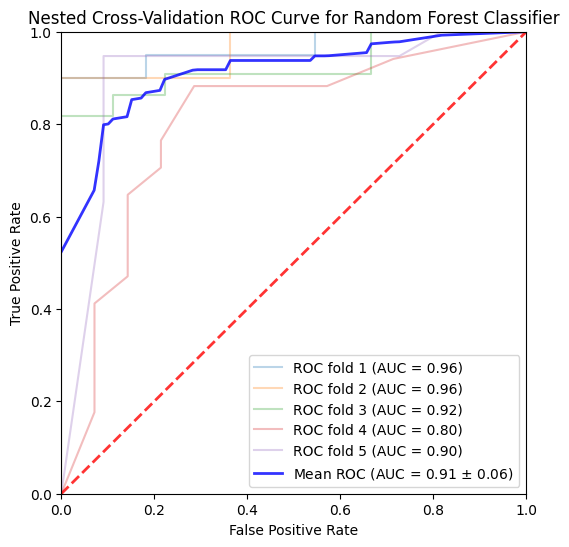

In [29]:
from sklearn.metrics import confusion_matrix, matthews_corrcoef

# Configure the cross-validation procedure
cv_outer = KFold(n_splits=5, shuffle=True, random_state=1)

# Initialize lists to store results
acc_results_r = []
precision_results_r = []
F1_results_r = []
recall_results_r = []
aucroc_results_r = []
mcc_results_r = []
aucs_r = []
tprs = []

# Store probability predictions and true labels here
r_kfold_probability = []
kfold_true_label_r = []

fig, ax = plt.subplots(figsize=(6, 6))
fold = 0

mean_fpr_r = np.linspace(0, 1, 100)

# Optimal threshold
optimal_threshold = 0.5  # You might want to optimize this further

for train_ix, test_ix in cv_outer.split(X):
    # Split data
    X_train, X_test = X[train_ix, :], X[test_ix, :]
    y_train, y_test = y[train_ix], y[test_ix]
    fold += 1
    
    # Configure the cross-validation procedure
    cv_inner = KFold(n_splits=3, shuffle=True, random_state=1)
    
    # Feature selection
    model_rfc = rfc.fit(X_train, y_train)
    feature_importances = model_rfc.feature_importances_
    selected_features = np.where(feature_importances > 0.01)[0]  # Set a threshold for feature selection
    selected_features_list.append(selected_features)
    
    # Subset the features in the training and test sets
    X_train_fs = X_train[:, selected_features]
    X_test_fs = X_test[:, selected_features]
    
    # Define the model with default hyperparameters
    model = RandomForestClassifier(random_state=22)
    
    # Define the grid of values to search
    param_grid = { 
        'n_estimators': [1, 10, 100],
        'max_features': ['sqrt', 'log2'],
        'max_depth': [1, 2, 3, 4],
        'criterion': ['gini', 'entropy']
    }
    
    # Define search
    search = GridSearchCV(model, param_grid, scoring='accuracy', cv=cv_inner, refit=True)
    
    # Execute the grid search
    result = search.fit(X_train_fs, y_train)
    best_model = result.best_estimator_
    
    y_pred_r = best_model.predict_proba(X_test_fs)[:, 1]
    
    # Compute and plot ROC curve
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_r)
    tprs.append(np.interp(mean_fpr_r, fpr, tpr))
    roc_auc = auc(fpr, tpr)
    aucs_r.append(roc_auc)
    plt.plot(fpr, tpr, lw=1.5, alpha=0.3, label='ROC fold %d (AUC = %0.2f)' % (fold, roc_auc))
    
    # Evaluate model on the hold out dataset
    probas_r = best_model.predict_proba(X_test_fs)
    yhat_r = best_model.predict(X_test_fs)
    
    # Evaluate the model
    acc_r = accuracy_score(y_test, yhat_r)
    precision_r = precision_score(y_test, yhat_r)
    recall_r = recall_score(y_test, yhat_r)
    f1_r = f1_score(y_test, yhat_r)
    
    # Optimize MCC with the threshold
    yhat_r_optimized = (probas_r[:, 1] >= optimal_threshold).astype(int)
    mcc_r = matthews_corrcoef(y_test, yhat_r_optimized)
    
    # Evaluate AUC
    auc_r = metrics.roc_auc_score(y_test, probas_r[:, 1])
    
    r_kfold_probability.append(probas_r[:, 1])
    kfold_true_label_r.append(y_test)
    
    # Store the result
    acc_results_r.append(acc_r)
    precision_results_r.append(precision_r)
    F1_results_r.append(f1_r)
    recall_results_r.append(recall_r)
    aucroc_results_r.append(auc_r)
    mcc_results_r.append(mcc_r)
    
    # Report progress
    print('>acc=%.3f, est=%.3f, cfg=%s' % (acc_r, result.best_score_, result.best_params_))

# Plot the mean ROC curve across all folds
mean_tpr_r = np.mean(tprs, axis=0)
mean_auc_r = auc(mean_fpr_r, mean_tpr_r)
std_auc_r = np.std(aucs_r)

# Summarize the estimated performance of the model
print('Accuracy: %.3f (%.3f)' % (mean(acc_results_r), std(acc_results_r)))
print('Precision: %.3f (%.3f)' % (mean(precision_results_r), std(precision_results_r)))
print('F1_Score: %.3f (%.3f)' % (mean(F1_results_r), std(F1_results_r)))
print('Recall: %.3f (%.3f)' % (mean(recall_results_r), std(recall_results_r)))
print('AUC_ROC: %.3f (%.3f)' % (mean(aucroc_results_r), std(aucroc_results_r)))
print('MCC: %.3f (%.3f)' % (mean(mcc_results_r), std(mcc_results_r)))

# Results
all_scores_rf = {
    "Accuracy": acc_results_r,
    'AUC-ROC': aucroc_results_r,
    'F1-Score': F1_results_r,
    'Recall': recall_results_r,
    'Precision': precision_results_r,
    'MCC': mcc_results_r,
    'Classifier': 'Random Forest'
}

all_scores_rf = pd.DataFrame(all_scores_rf)

plt.plot(mean_fpr_r, mean_tpr_r, color='b', label=r"Mean ROC (AUC = %0.2f $\pm$ %0.2f)" % (mean_auc_r, std_auc_r), lw=2, alpha=.8)

# Plot the chance line
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r', alpha=.8)

# Finalize the plot
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Nested Cross-Validation ROC Curve for Random Forest Classifier')
plt.legend(loc="lower right")
plt.savefig('roc_rforest', dpi=300)

# Append new data to data_classifier
data_rf = pd.DataFrame(data=[['Random Forest',
                              '%.3f (%.3f)' % (mean(acc_results_r), std(acc_results_r)),
                              '%.3f (%.3f)' % (mean(aucroc_results_r), std(aucroc_results_r)),
                              '%.3f (%.3f)' % (mean(F1_results_r), std(F1_results_r)),
                              '%.3f (%.3f)' % (mean(mcc_results_r), std(mcc_results_r))]],
                       columns=['Classifier', 'Accuracy', 'AUC-ROC', 'F1 score', 'MCC'])

data_classifier = pd.concat([data_classifier, data_rf], ignore_index=True)

# XGBoost

KeyboardInterrupt: 

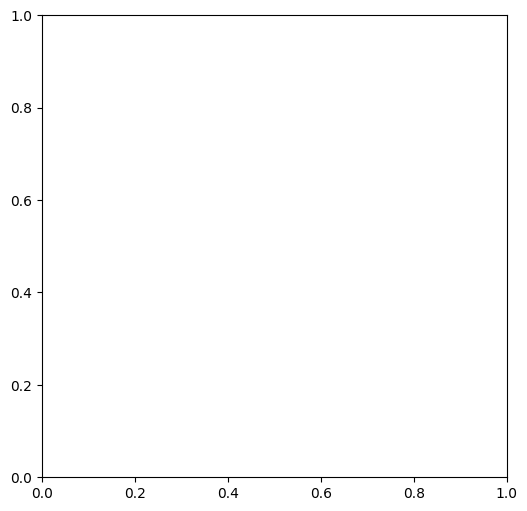

In [30]:
target=['remission','del_das', 'effectiveness','effect_n']
#select all columns except 'col_nandata'
X=dataset.loc[:, ~dataset.columns.isin(target)].drop(['tptID', 'index','Uveitis','bDMARD_intake_duration_days','DateDiff_NM'], axis=1)


y_effect=dataset.loc[:,'effectiveness']
y = y_effect
# configure the cross-validation procedure
cv_outer = KFold(n_splits=5, shuffle=True, random_state=1)
# Configure the cross-validation procedure
cv_outer = KFold(n_splits=5, shuffle=True, random_state=1)

# Initialize lists to store results
acc_results_x = []
precision_results_x = []
F1_results_x = []
recall_results_x = []
aucroc_results_x = []
mcc_results_x = []
aucs_x = []
tprs = []

# Store probability predictions and true labels here
x_kfold_probability = []
kfold_true_label_x = []

fig, ax = plt.subplots(figsize=(6, 6))

fold = 0
iter_shap = 0
indices = []
df_avg_train = []
df_avg_test = []

mean_fpr_x = np.linspace(0, 1, 100)

# Optimal threshold
optimal_threshold = 0.5  # You might want to optimize this further

for train_ix, test_ix in cv_outer.split(X):
    fold += 1
    
    # Split data
    X_train, X_test = X.iloc[train_ix, :], X.iloc[test_ix, :]
    y_train, y_test = y.iloc[train_ix], y.iloc[test_ix]
    
    # Configure the cross-validation procedure
    cv_inner = KFold(n_splits=3, shuffle=True, random_state=1)
    
    # Feature selection
    model_rfc = rfc.fit(X_train, y_train)
    feature_importances = model_rfc.feature_importances_
    selected_features = np.where(feature_importances > 0.01)[0]  # Set a threshold for feature selection
    selected_features_list.append(selected_features)
   
    # Subset the features in the training and test sets
    X_train_fs = X_train.iloc[:, selected_features]
    X_test_fs = X_test.iloc[:, selected_features]
    
    # Define the model with default hyperparameters
    model = XGBClassifier(n_jobs=-1)
    
    # Define the grid of values to search
    param_grid = {
        'learning_rate': [0.001, 0.01, 0.1, 0.2, 0.3],
        'max_depth': [3, 5, 7, 9, 11],
        'subsample': [0.6, 0.7, 0.8, 0.9, 1.0],
        'colsample_bytree': [0.6, 0.7, 0.8, 0.9, 1.0],
        'reg_alpha': [0, 0.001, 0.01, 0.1, 0.5],
        'reg_lambda': [0, 0.001, 0.01, 0.1, 0.5],
        'n_estimators': [10, 100, 200, 500]
    }
    
    # Define search
    search = GridSearchCV(model, param_grid, scoring='accuracy', cv=cv_inner, refit=True)
    
    # Execute the grid search
    result = search.fit(X_train_fs, y_train)
    best_model = result.best_estimator_
    
    y_pred_x = best_model.predict_proba(X_test_fs)[:, 1]
    
    # Compute and plot ROC curve
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_x)
    tprs.append(np.interp(mean_fpr_x, fpr, tpr))
    roc_auc = auc(fpr, tpr)
    aucs_x.append(roc_auc)
    plt.plot(fpr, tpr, lw=1.5, alpha=0.3, label='ROC fold %d (AUC = %0.2f)' % (fold, roc_auc))
    
    # Evaluate model on the hold out dataset
    probas_x = best_model.predict_proba(X_test_fs)

    yhat_x = best_model.predict(X_test_fs)
    
    # Evaluate the model
    acc_x = accuracy_score(y_test, yhat_x)
    precision_x = precision_score(y_test, yhat_x)
    recall_x = recall_score(y_test, yhat_x)
    f1_x = f1_score(y_test, yhat_x)
    
    # Optimize MCC with the threshold
    yhat_x_optimized = (probas_x[:, 1] >= optimal_threshold).astype(int)
    mcc_x = matthews_corrcoef(y_test, yhat_x_optimized)
    
    # Evaluate AUC
    auc_x = metrics.roc_auc_score(y_test, probas_x[:, 1])
    
    ## Calibration
    x_kfold_probability.append(probas_x[:, 1])
    kfold_true_label_x.append(y_test)
    
    # Store the result
    acc_results_x.append(acc_x)
    precision_results_x.append(precision_x)
    recall_results_x.append(recall_x)
    F1_results_x.append(f1_x)
    aucroc_results_x.append(auc_x)
    mcc_results_x.append(mcc_x)
    
    # Report progress
    print('>acc=%.3f, est=%.3f, cfg=%s' % (acc_x, result.best_score_, result.best_params_))
    '''
    # Defining the SHAP value classifier
    classifier_shap = best_model
    classifier_shap.fit(X_train, y_train)

    # SHAP values for training data
    train_tmp_df = pd.DataFrame(X_train, columns=X.columns)
    explainer = shap.TreeExplainer(classifier_shap, train_tmp_df, feature_perturbation='interventional', model_output='probability')

    # SHAP values for test data
    test_tmp_df = pd.DataFrame(X_test, columns=X.columns)
    test_explainer = shap.TreeExplainer(classifier_shap, test_tmp_df, feature_perturbation='interventional', model_output='probability')

    df_shap_train = pd.DataFrame(explainer.shap_values(train_tmp_df), columns=X.columns)
    df_shap_train["index"] = train_ix
    df_avg_train.append(df_shap_train)

    test_df_shap = pd.DataFrame(test_explainer.shap_values(test_tmp_df), columns=X.columns)
    test_df_shap["index"] = test_ix
    df_avg_test.append(test_df_shap)

    iter_shap += 1
'''
# Summarize the estimated performance of the model
print('Accuracy: %.3f (%.3f)' % (mean(acc_results_x), std(acc_results_x)))
print('Precision: %.3f (%.3f)' % (mean(precision_results_x), std(precision_results_x)))
print('F1_Score: %.3f (%.3f)' % (mean(F1_results_x), std(F1_results_x)))
print('Recall: %.3f (%.3f)' % (mean(recall_results_x), std(recall_results_x)))
print('AUC_ROC: %.3f (%.3f)' % (mean(aucroc_results_x), std(aucroc_results_x)))
print('MCC: %.3f (%.3f)' % (mean(mcc_results_x), std(mcc_results_x)))

# Results
all_scores_x = {
    "Accuracy": acc_results_x,
    'AUC-ROC': aucroc_results_x,
    'F1-Score': F1_results_x,
    'Recall': recall_results_x,
    'Precision': precision_results_x,
    'MCC': mcc_results_x,
    'Classifier': 'XGBoost'
}

all_scores_x = pd.DataFrame(all_scores_x)

# Plot the mean ROC curve across all folds
mean_tpr_x = np.mean(tprs, axis=0)
mean_auc_x = auc(mean_fpr_x, mean_tpr_x)
std_auc_x = np.std(aucs_x)

plt.plot(mean_fpr_x, mean_tpr_x, color='b', label=r"Mean ROC (AUC = %0.2f $\pm$ %0.2f)" % (mean_auc_x, std_auc_x), lw=2, alpha=.8)

# Plot the chance line
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r', alpha=.8)

# Finalize the plot
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Nested Cross-Validation ROC Curve for XGBoost Classifier')
plt.legend(loc="lower right")
plt.savefig('roc_xgboost', dpi=300)

# Append new data to data_classifier
data_xgboost = pd.DataFrame(data=[['XGBoost',
                                   '%.3f (%.3f)' % (mean(acc_results_x), std(acc_results_x)),
                                   '%.3f (%.3f)' % (mean(aucroc_results_x), std(aucroc_results_x)),
                                   '%.3f (%.3f)' % (mean(F1_results_x), std(F1_results_x)),
                                   '%.3f (%.3f)' % (mean(mcc_results_x), std(mcc_results_x))]],
                            columns=['Classifier', 'Accuracy', 'AUC-ROC', 'F1 score', 'MCC'])

data_classifier = pd.concat([data_classifier, data_xgboost], ignore_index=True)

In [ ]:
from sklearn.metrics import matthews_corrcoef
from sklearn.model_selection import RandomizedSearchCV
import shap

# Configure the cross-validation procedure
cv_outer = KFold(n_splits=5, shuffle=True, random_state=1)

# Initialize lists to store results
acc_results_x = []
precision_results_x = []
F1_results_x = []
recall_results_x = []
aucroc_results_x = []
mcc_results_x = []
aucs_x = []
tprs = []

# Store probability predictions and true labels here
x_kfold_probability = []
kfold_true_label_x = []

fig, ax = plt.subplots(figsize=(6, 6))

fold = 0
iter_shap = 0
indices = []
df_avg_train = []
df_avg_test = []

mean_fpr_x = np.linspace(0, 1, 100)

# Optimal threshold
optimal_threshold = 0.5  # You might want to optimize this further

for train_ix, test_ix in cv_outer.split(X):
    fold += 1
    
    # Split data
    X_train, X_test = X.iloc[train_ix, :], X.iloc[test_ix, :]
    y_train, y_test = y.iloc[train_ix], y.iloc[test_ix]
    
    # Configure the cross-validation procedure
    cv_inner = KFold(n_splits=3, shuffle=True, random_state=1)
    
    # Feature selection
    model_rfc = rfc.fit(X_train, y_train)
    feature_importances = model_rfc.feature_importances_
    selected_features = np.where(feature_importances > 0.01)[0]  # Set a threshold for feature selection
    selected_features_list.append(selected_features)
   
    # Subset the features in the training and test sets
    X_train_fs = X_train.iloc[:, selected_features]
    X_test_fs = X_test.iloc[:, selected_features]
    
    # Define the model with default hyperparameters
    model = XGBClassifier(n_jobs=-1)
    
    # Define a smaller grid of values to search
    param_grid_d = {
        'learning_rate': [0.01, 0.1, 0.2],
        'max_depth': [3, 5, 7],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'reg_alpha': [0, 0.01, 0.1],
        'reg_lambda': [0, 0.01, 0.1],
        'n_estimators': [50, 100, 200]
    }
    param_grid = {'n_estimators': [10,20, 5,50, 100, 150], 'max_depth': [0.5,1,2, 3,4, 6], 'learning_rate': [1e-20,1e-15,1e-3,1e-2,1,0.1, 0.01, 0.001,10]}

    # Define search
    search = RandomizedSearchCV(model, param_distributions=param_grid, n_iter=50, scoring='accuracy', cv=cv_inner, refit=True, n_jobs=-1, random_state=1)
    
    # Execute the grid search
    result = search.fit(X_train_fs, y_train)
    best_model = result.best_estimator_
    
    y_pred_x = best_model.predict_proba(X_test_fs)[:, 1]
    
    # Compute and plot ROC curve
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_x)
    tprs.append(np.interp(mean_fpr_x, fpr, tpr))
    roc_auc = auc(fpr, tpr)
    aucs_x.append(roc_auc)
    plt.plot(fpr, tpr, lw=1.5, alpha=0.3, label='ROC fold %d (AUC = %0.2f)' % (fold, roc_auc))
    
    # Evaluate model on the hold out dataset
    probas_x = best_model.predict_proba(X_test_fs)

    yhat_x = best_model.predict(X_test_fs)
    
    # Evaluate the model
    acc_x = accuracy_score(y_test, yhat_x)
    precision_x = precision_score(y_test, yhat_x)
    recall_x = recall_score(y_test, yhat_x)
    f1_x = f1_score(y_test, yhat_x)
    
    # Optimize MCC with the threshold
    yhat_x_optimized = (probas_x[:, 1] >= optimal_threshold).astype(int)
    mcc_x = matthews_corrcoef(y_test, yhat)
    
    # Evaluate AUC
    auc_x = metrics.roc_auc_score(y_test, probas_x[:, 1])
     # Store the result
    acc_results_x.append(acc_x)
    precision_results_x.append(precision_x)
    recall_results_x.append(recall_x)
    F1_results_x.append(f1_x)
    aucroc_results_x.append(auc_x)
    mcc_results_x.append(mcc_x)
    
    # Report progress
    print('>acc=%.3f, est=%.3f, cfg=%s' % (acc_x, result.best_score_, result.best_params_))
'''      
    ## Calibration
    x_kfold_probability.append(probas_x[:, 1])
    kfold_true_label_x.append(y_test)
    
   
    
   
 
    # Defining the SHAP value classifier
    classifier_shap = best_model
    classifier_shap.fit(X_train, y_train)

    # SHAP values for training data
    train_tmp_df = pd.DataFrame(X_train, columns=X.columns)
    explainer = shap.TreeExplainer(classifier_shap, train_tmp_df, feature_perturbation='interventional', model_output='probability')

    # SHAP values for test data
    test_tmp_df = pd.DataFrame(X_test, columns=X.columns)
    test_explainer = shap.TreeExplainer(classifier_shap, test_tmp_df, feature_perturbation='interventional', model_output='probability')

    df_shap_train = pd.DataFrame(explainer.shap_values(train_tmp_df), columns=X.columns)
    df_shap_train["index"] = train_ix
    df_avg_train.append(df_shap_train)

    test_df_shap = pd.DataFrame(test_explainer.shap_values(test_tmp_df), columns=X.columns)
    test_df_shap["index"] = test_ix
    df_avg_test.append(test_df_shap)

    iter_shap += 1
'''
# Summarize the estimated performance of the model
print('Accuracy: %.3f (%.3f)' % (mean(acc_results_x), std(acc_results_x)))
print('Precision: %.3f (%.3f)' % (mean(precision_results_x), std(precision_results_x)))
print('F1_Score: %.3f (%.3f)' % (mean(F1_results_x), std(F1_results_x)))
print('Recall: %.3f (%.3f)' % (mean(recall_results_x), std(recall_results_x)))
print('AUC_ROC: %.3f (%.3f)' % (mean(aucroc_results_x), std(aucroc_results_x)))
print('MCC: %.3f (%.3f)' % (mean(mcc_results_x), std(mcc_results_x)))

# Results
all_scores_x = {
    "Accuracy": acc_results_x,
    'AUC-ROC': aucroc_results_x,
    'F1-Score': F1_results_x,
    'Recall': recall_results_x,
    'Precision': precision_results_x,
    'MCC': mcc_results_x,
    'Classifier': 'XGBoost'
}

all_scores_x = pd.DataFrame(all_scores_x)

# Plot the mean ROC curve across all folds
mean_tpr_x = np.mean(tprs, axis=0)
mean_auc_x = auc(mean_fpr_x, mean_tpr_x)
std_auc_x = np.std(aucs_x)

plt.plot(mean_fpr_x, mean_tpr_x, color='b', label=r"Mean ROC (AUC = %0.2f $\pm$ %0.2f)" % (mean_auc_x, std_auc_x), lw=2, alpha=.8)

# Plot the chance line
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r', alpha=.8)

# Finalize the plot
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Nested Cross-Validation ROC Curve for XGBoost Classifier')
plt.legend(loc="lower right")
plt.savefig('roc_xgboost', dpi=300)

# Append new data to data_classifier
data_xgboost = pd.DataFrame(data=[['XGBoost',
                                   '%.3f (%.3f)' % (mean(acc_results_x), std(acc_results_x)),
                                   '%.3f (%.3f)' % (mean(aucroc_results_x), std(aucroc_results_x)),
                                   '%.3f (%.3f)' % (mean(F1_results_x), std(F1_results_x)),
                                   '%.3f (%.3f)' % (mean(mcc_results_x), std(mcc_results_x))]],
                            columns=['Classifier', 'Accuracy', 'AUC-ROC', 'F1 score', 'MCC'])

data_classifier = pd.concat([data_classifier, data_xgboost], ignore_index=True)


In [ ]:
from sklearn.metrics import matthews_corrcoef
from sklearn.model_selection import RandomizedSearchCV
import shap

# Configure the cross-validation procedure
cv_outer = KFold(n_splits=5, shuffle=True, random_state=1)

# Initialize lists to store results
acc_results_x = []
precision_results_x = []
F1_results_x = []
recall_results_x = []
aucroc_results_x = []
mcc_results_x = []
aucs_x = []
tprs = []

# Store probability predictions and true labels here
x_kfold_probability = []
kfold_true_label_x = []

fig, ax = plt.subplots(figsize=(6, 6))

fold = 0

mean_fpr_x = np.linspace(0, 1, 100)

# Optimal threshold
optimal_threshold = 0.5  # You might want to optimize this further

for train_ix, test_ix in cv_outer.split(X):
    fold += 1
    
    # Split data
    X_train, X_test = X.iloc[train_ix, :], X.iloc[test_ix, :]
    y_train, y_test = y.iloc[train_ix], y.iloc[test_ix]
    
    # Configure the cross-validation procedure
    cv_inner = KFold(n_splits=3, shuffle=True, random_state=1)
    
    # Feature selection
    model_rfc = rfc.fit(X_train, y_train)
    feature_importances = model_rfc.feature_importances_
    selected_features = np.where(feature_importances > 0.01)[0]  # Set a threshold for feature selection
   
    # Subset the features in the training and test sets
    X_train_fs = X_train.iloc[:, selected_features]
    X_test_fs = X_test.iloc[:, selected_features]
    
    # Define the model with default hyperparameters
    model = XGBClassifier(n_jobs=-1, early_stopping_rounds=10, eval_metric='logloss')
    
    # Define a smaller grid of values to search
    param_grid = {
        'min_child_weight': [1, 5, 10],
        'gamma': [0,0.5, 1, 1.5, 2, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5]
        }
    

    # Define search
    search = RandomizedSearchCV(model, param_distributions=param_grid, n_iter=10, scoring='accuracy', cv=cv_inner, refit=True, n_jobs=-1, random_state=1)
    
    # Execute the grid search
    result = search.fit(X_train_fs, y_train, eval_set=[(X_test_fs, y_test)], verbose=False)
    best_model = result.best_estimator_
    
    y_pred_x = best_model.predict_proba(X_test_fs)[:, 1]
    
    # Compute and plot ROC curve
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_x)
    tprs.append(np.interp(mean_fpr_x, fpr, tpr))
    roc_auc = auc(fpr, tpr)
    aucs_x.append(roc_auc)
    plt.plot(fpr, tpr, lw=1.5, alpha=0.3, label='ROC fold %d (AUC = %0.2f)' % (fold, roc_auc))
    
    # Evaluate model on the hold out dataset
    probas_x = best_model.predict_proba(X_test_fs)

    yhat_x = best_model.predict(X_test_fs)
    
    # Evaluate the model
    acc_x = accuracy_score(y_test, yhat_x)
    precision_x = precision_score(y_test, yhat_x)
    recall_x = recall_score(y_test, yhat_x)
    f1_x = f1_score(y_test, yhat_x)
    
    # Optimize MCC with the threshold
    yhat_x_optimized = (probas_x[:, 1] >= optimal_threshold).astype(int)
    mcc_x = matthews_corrcoef(y_test, yhat_x_optimized)
    
    # Evaluate AUC
    auc_x = metrics.roc_auc_score(y_test, probas_x[:, 1])
    
    # Store the result
    acc_results_x.append(acc_x)
    precision_results_x.append(precision_x)
    recall_results_x.append(recall_x)
    F1_results_x.append(f1_x)
    aucroc_results_x.append(auc_x)
    mcc_results_x.append(mcc_x)
    
    # Report progress
    print('>acc=%.3f, est=%.3f, cfg=%s' % (acc_x, result.best_score_, result.best_params_))

# Summarize the estimated performance of the model
print('Accuracy: %.3f (%.3f)' % (mean(acc_results_x), std(acc_results_x)))
print('Precision: %.3f (%.3f)' % (mean(precision_results_x), std(precision_results_x)))
print('F1_Score: %.3f (%.3f)' % (mean(F1_results_x), std(F1_results_x)))
print('Recall: %.3f (%.3f)' % (mean(recall_results_x), std(recall_results_x)))
print('AUC_ROC: %.3f (%.3f)' % (mean(aucroc_results_x), std(aucroc_results_x)))
print('MCC: %.3f (%.3f)' % (mean(mcc_results_x), std(mcc_results_x)))

# Results
all_scores_x = {
    "Accuracy": acc_results_x,
    'AUC-ROC': aucroc_results_x,
    'F1-Score': F1_results_x,
    'Recall': recall_results_x,
    'Precision': precision_results_x,
    'MCC': mcc_results_x,
    'Classifier': 'XGBoost'
}

all_scores_x = pd.DataFrame(all_scores_x)

# Plot the mean ROC curve across all folds
mean_tpr_x = np.mean(tprs, axis=0)
mean_auc_x = auc(mean_fpr_x, mean_tpr_x)
std_auc_x = np.std(aucs_x)

plt.plot(mean_fpr_x, mean_tpr_x, color='b', label=r"Mean ROC (AUC = %0.2f $\pm$ %0.2f)" % (mean_auc_x, std_auc_x), lw=2, alpha=.8)

# Plot the chance line
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r', alpha=.8)

# Finalize the plot
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Nested Cross-Validation ROC Curve for XGBoost Classifier')
plt.legend(loc="lower right")
plt.savefig('roc_xgboost', dpi=300)

# Append new data to data_classifier
data_xgboost = pd.DataFrame(data=[['XGBoost',
                                   '%.3f (%.3f)' % (mean(acc_results_x), std(acc_results_x)),
                                   '%.3f (%.3f)' % (mean(aucroc_results_x), std(aucroc_results_x)),
                                   '%.3f (%.3f)' % (mean(F1_results_x), std(F1_results_x)),
                                   '%.3f (%.3f)' % (mean(mcc_results_x), std(mcc_results_x))]],
                            columns=['Classifier', 'Accuracy', 'AUC-ROC', 'F1 score', 'MCC'])

data_classifier = pd.concat([data_classifier, data_xgboost], ignore_index=True)


>acc=0.968, est=0.951, cfg={'colsample_bytree': 0.8, 'gamma': 1, 'max_depth': 3, 'min_child_weight': 1, 'subsample': 1.0}
>acc=0.903, est=0.943, cfg={'colsample_bytree': 0.6, 'gamma': 1.5, 'max_depth': 3, 'min_child_weight': 1, 'subsample': 0.8}
>acc=0.935, est=0.951, cfg={'colsample_bytree': 1.0, 'gamma': 1.5, 'max_depth': 3, 'min_child_weight': 1, 'subsample': 1.0}
>acc=0.968, est=0.959, cfg={'colsample_bytree': 0.8, 'gamma': 5, 'max_depth': 3, 'min_child_weight': 1, 'subsample': 1.0}
>acc=0.933, est=0.935, cfg={'colsample_bytree': 1.0, 'gamma': 1, 'max_depth': 3, 'min_child_weight': 1, 'subsample': 1.0}
Accuracy: 0.942 (0.024)
Precision: 0.972 (0.038)
F1_Score: 0.954 (0.020)
Recall: 0.939 (0.049)
AUC_ROC: 0.966 (0.018)
MCC: 0.878 (0.048)


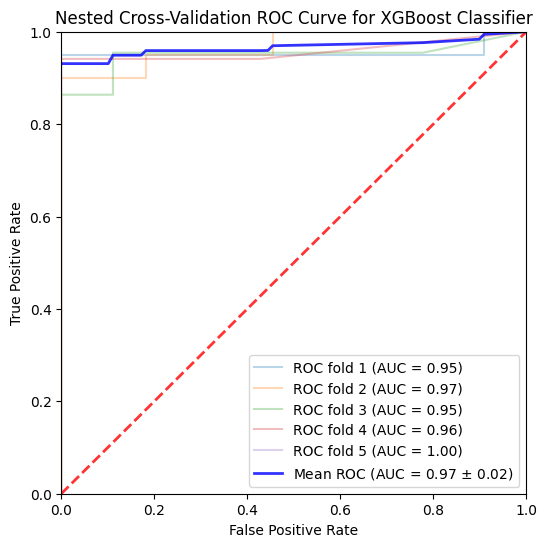

In [31]:
from sklearn.metrics import matthews_corrcoef
from sklearn.model_selection import GridSearchCV
import shap

# Load data
# Normalize
target = ['remission', 'del_das', 'effectiveness', 'effect_n']
# Select all columns except 'col_nandata'
X = dataset.loc[:, ~dataset.columns.isin(target)].drop(['tptID', 'index', 'Uveitis', 'bDMARD_intake_duration_days', 'DateDiff_NM'], axis=1)

y_effect = dataset.loc[:, 'effectiveness']
y = y_effect

# Configure the cross-validation procedure
cv_outer = KFold(n_splits=5, shuffle=True, random_state=1)

# Initialize lists to store results
acc_results_x = []
precision_results_x = []
F1_results_x = []
recall_results_x = []
aucroc_results_x = []
mcc_results_x = []
aucs_x = []
tprs = []

# Store probability predictions and true labels here
x_kfold_probability = []
kfold_true_label_x = []

fig, ax = plt.subplots(figsize=(6, 6))

fold = 0
iter_shap = 0
indices = []
df_avg_train = []
df_avg_test = []

mean_fpr_x = np.linspace(0, 1, 100)

for train_ix, test_ix in cv_outer.split(X):
    fold += 1
    
    # Split data
    X_train, X_test = X.iloc[train_ix, :], X.iloc[test_ix, :]
    y_train, y_test = y.iloc[train_ix], y.iloc[test_ix]
    
    # Configure the cross-validation procedure
    cv_inner = KFold(n_splits=3, shuffle=True, random_state=1)
    
    # Feature selection
    model_rfc = rfc.fit(X_train, y_train)
    feature_importances = model_rfc.feature_importances_
    selected_features = np.where(feature_importances > 0.01)[0]  # Set a threshold for feature selection
    selected_features_list.append(selected_features)
   
    # Subset the features in the training and test sets
    X_train_fs = X_train.iloc[:, selected_features]
    X_test_fs = X_test.iloc[:, selected_features]
    
    # Define the model with default hyperparameters
    model = XGBClassifier(n_jobs=-1)
    
    # Define the grid of values to search
    param_grid_d = {
        'learning_rate': [0.001, 0.01, 0.1, 0.2, 0.3],
        'max_depth': [3, 5, 7, 9, 11],
        'subsample': [0.6, 0.7, 0.8, 0.9, 1.0],
        'colsample_bytree': [0.6, 0.7, 0.8, 0.9, 1.0],
        'reg_alpha': [0, 0.001, 0.01, 0.1, 0.5],
        'reg_lambda': [0, 0.001, 0.01, 0.1, 0.5],
        'n_estimators': [10, 100, 200, 500]
    }
    # Define a smaller grid of values to search
    param_grid = {
        'min_child_weight': [1, 5, 10],
        'gamma': [0,0.5, 1, 1.5, 2, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5]
        }
    
    
    # Define search
    search = GridSearchCV(model, param_grid, scoring='accuracy', cv=cv_inner, refit=True)
    
    # Execute the grid search
    result = search.fit(X_train_fs, y_train)
    best_model = result.best_estimator_
    
    y_pred_x = best_model.predict_proba(X_test_fs)[:, 1]
    
    # Compute and plot ROC curve
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_x)
    tprs.append(np.interp(mean_fpr_x, fpr, tpr))
    roc_auc = auc(fpr, tpr)
    aucs_x.append(roc_auc)
    plt.plot(fpr, tpr, lw=1.5, alpha=0.3, label='ROC fold %d (AUC = %0.2f)' % (fold, roc_auc))
    
    # Evaluate model on the hold out dataset
    probas_x = best_model.predict_proba(X_test_fs)

    yhat_x = best_model.predict(X_test_fs)
    
    # Evaluate the model
    acc_x = accuracy_score(y_test, yhat_x)
    precision_x = precision_score(y_test, yhat_x)
    recall_x = recall_score(y_test, yhat_x)
    f1_x = f1_score(y_test, yhat_x)
    mcc_x = matthews_corrcoef(y_test, yhat_x)
    
    # Evaluate AUC
    auc_x = metrics.roc_auc_score(y_test, probas_x[:, 1])
    
    ## Calibration
    # x_kfold_probability.append(probas_x[:, 1])
    # kfold_true_label_x.append(y_test)
    
    # Store the result
    acc_results_x.append(acc_x)
    precision_results_x.append(precision_x)
    recall_results_x.append(recall_x)
    F1_results_x.append(f1_x)
    aucroc_results_x.append(auc_x)
    mcc_results_x.append(mcc_x)
    
    # Report progress
    print('>acc=%.3f, est=%.3f, cfg=%s' % (acc_x, result.best_score_, result.best_params_))
    
    # Defining the SHAP value classifier
    # classifier_shap = best_model
    # classifier_shap.fit(X_train, y_train)

    # ############## SHAP VALUES ################
    # train_tmp_df = pd.DataFrame(X_train, columns=X.columns)
    # explainer = shap.TreeExplainer(classifier_shap, train_tmp_df, feature_perturbation='interventional', model_output='probability')

    # ### TEST DATA
    # test_tmp_df = pd.DataFrame(X_test, columns=X.columns)
    # test_explainer = shap.TreeExplainer(classifier_shap, test_tmp_df, feature_perturbation='interventional', model_output='probability')

    # df_shap_train = pd.DataFrame(explainer.shap_values(train_tmp_df), columns=X.columns)
    # df_shap_train["index"] = train_ix

    # df_avg_train.append(df_shap_train)

    # test_df_shap = pd.DataFrame(test_explainer.shap_values(test_tmp_df), columns=X.columns)
    # test_df_shap["index"] = test_ix
    # df_avg_test.append(test_df_shap)

    # iter_shap += 1

# Summarize the estimated performance of the model
print('Accuracy: %.3f (%.3f)' % (mean(acc_results_x), std(acc_results_x)))
print('Precision: %.3f (%.3f)' % (mean(precision_results_x), std(precision_results_x)))
print('F1_Score: %.3f (%.3f)' % (mean(F1_results_x), std(F1_results_x)))
print('Recall: %.3f (%.3f)' % (mean(recall_results_x), std(recall_results_x)))
print('AUC_ROC: %.3f (%.3f)' % (mean(aucroc_results_x), std(aucroc_results_x)))
print('MCC: %.3f (%.3f)' % (mean(mcc_results_x), std(mcc_results_x)))

# Results
all_scores_x = {
    "Accuracy": acc_results_x,
    'AUC-ROC': aucroc_results_x,
    'F1-Score': F1_results_x,
    'Recall': recall_results_x,
    'Precision': precision_results_x,
    'MCC': mcc_results_x,
    'Classifier': 'XGBoost'
}

all_scores_x = pd.DataFrame(all_scores_x)

# Plot the mean ROC curve across all folds
mean_tpr_x = np.mean(tprs, axis=0)
mean_auc_x = auc(mean_fpr_x, mean_tpr_x)
std_auc_x = np.std(aucs_x)

plt.plot(mean_fpr_x, mean_tpr_x, color='b', label=r"Mean ROC (AUC = %0.2f $\pm$ %0.2f)" % (mean_auc_x, std_auc_x), lw=2, alpha=.8)

# Plot the chance line
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r', alpha=.8)

# Finalize the plot
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Nested Cross-Validation ROC Curve for XGBoost Classifier')
plt.legend(loc="lower right")
plt.savefig('roc_xgboost', dpi=300)


In [32]:
data_classifier

,Classifier,Accuracy,AUC-ROC,F1 score,MCC
0,AdaBoost,0.851 (0.060),0.845 (0.064),0.876 (0.065),0.686 (0.114)
1,SVM,0.649 (0.112),0.696 (0.124),0.717 (0.087),0.244 (0.268)
2,Random Forest,0.844 (0.056),0.912 (0.059),0.872 (0.063),0.670 (0.103)


In [33]:
# Append new data to data_classifier
data_xgboost = pd.DataFrame(data=[['XGBoost',
                                   '%.3f (%.3f)' % (mean(acc_results_x), std(acc_results_x)),
                                   '%.3f (%.3f)' % (mean(aucroc_results_x), std(aucroc_results_x)),
                                   '%.3f (%.3f)' % (mean(F1_results_x), std(F1_results_x)),
                                   '%.3f (%.3f)' % (mean(mcc_results_x), std(mcc_results_x))]],
                            columns=['Classifier', 'Accuracy', 'AUC-ROC', 'F1 score', 'MCC'])

data_classifier = pd.concat([data_classifier, data_xgboost], ignore_index=True)

In [ ]:
data_classifier

#Sustained

In [34]:
# Load data
target=['remission','del_das', 'effectiveness','effect_n','sustained']
#select all columns except 'col_nandata'
X_sustained=dataset.loc[:, ~dataset.columns.isin(target)].drop(['tptID', 'index','Uveitis','bDMARD_intake_duration_days','DateDiff_NM','level_0'], axis=1)
X_s=X_sustained

y_effect_s=dataset.loc[:,'sustained']
y_s= y_effect_s

X_s=X_s.to_numpy()

y_s=y_s.to_numpy()

In [ ]:
data_classifier_s=pd.DataFrame(columns=['Classifier','Accuracy','AUC-ROC','F1 score','MCC'])


#ADAboost

>acc=0.806, est=0.740, cfg={'learning_rate': 1e-15, 'n_estimators': 1}
>acc=0.839, est=0.764, cfg={'learning_rate': 1e-15, 'n_estimators': 1}
>acc=0.806, est=0.813, cfg={'learning_rate': 1e-15, 'n_estimators': 1}
>acc=0.774, est=0.837, cfg={'learning_rate': 1e-15, 'n_estimators': 1}
>acc=0.900, est=0.774, cfg={'learning_rate': 1e-15, 'n_estimators': 1}
Accuracy: 0.825 (0.043)
Precision: 0.814 (0.054)
F1_Score: 0.845 (0.047)
Recall: 0.883 (0.075)
AUC_ROC: 0.820 (0.040)
MCC: 0.649 (0.086)


NameError: name 'data_classifier_s' is not defined

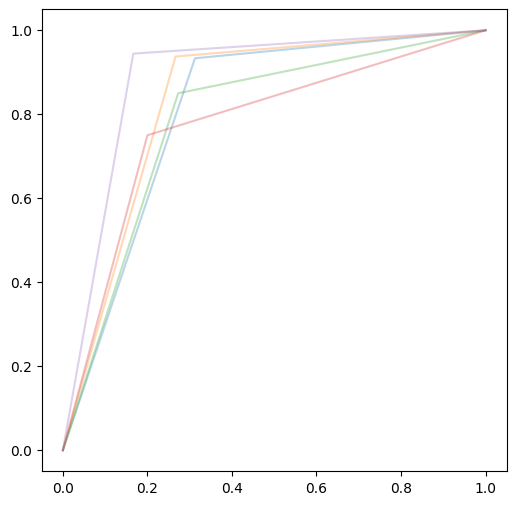

In [35]:
from sklearn.metrics import matthews_corrcoef
from sklearn.model_selection import KFold, GridSearchCV, cross_val_score
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Ignore all FutureWarnings
warnings.simplefilter(action='ignore', category=FutureWarning)
# Configure the cross-validation procedure
cv_outer = KFold(n_splits=5, shuffle=True, random_state=1)

# Define the random forest classifier
rfc = RandomForestClassifier(n_estimators=100, random_state=42)

# Initialize lists to store results
acc_results_ada = []
precision_results_ada = []
F1_results_ada = []
recall_results_ada = []
aucroc_results_ada = []
mcc_results_ada = []
aucs_ada = []

# Store probability predictions and true labels here
y_prob_all_ADA = []
selected_features_list = []
best_params_list = []
cross_val_scores_list = []
ada_kfold_probability = []
kfold_true_label_ada = []

# Define the AdaBoost classifier with decision tree as base estimator
dtc = DecisionTreeClassifier(max_depth=1)

tprs = []
mean_fpr_ada_s = np.linspace(0, 1, 100)
fig, ax = plt.subplots(figsize=(6, 6))
fold = 0

for train_ix, test_ix in cv_outer.split(X_s, y_s):
    # Split data
    X_train, X_test = X_s[train_ix], X_s[test_ix]
    y_train, y_test = y_s[train_ix], y_s[test_ix]
    
    # Configure the cross-validation procedure
    cv_inner = KFold(n_splits=3, shuffle=True, random_state=1)
    fold += 1
    
    # Feature selection
    model_rfc = rfc.fit(X_train, y_train)
    feature_importances = model_rfc.feature_importances_
    selected_features = np.where(feature_importances > 0.01)[0]  # Set a threshold for feature selection
    selected_features_list.append(selected_features)
    
    # Define the model with default hyperparameters
    model = AdaBoostClassifier()
    
    # Define the grid of values to search
    space = {
        'n_estimators': [1, 10, 50],
        'learning_rate': [1e-15, 1e-14, 1e-13, 1e-12, 1e-11, 1e-10, 1e-9, 1e-8, 1e-7]
    }

    # Subset the features in the training and test sets
    X_train_fs = X_train[:, selected_features]
    X_test_fs = X_test[:, selected_features]
    
    # Define search
    search = GridSearchCV(model, space, scoring='accuracy', cv=cv_inner, refit=True)
    scores = cross_val_score(search, X_train_fs, y_train, cv=cv_inner)
    cross_val_scores_list.append(scores.mean())
    
    # Execute the grid search
    result = search.fit(X_train_fs, y_train)
    best_params = result.best_params_
    best_params_list.append(best_params)
    
    # Get the best performing model fit on the whole training set
    best_model = result.best_estimator_
    
    def predict_proba(self, X):
        """Min-max scale output of `decision_function` to [0, 1]."""
        df = self.decision_function(X)
        calibrated_df = (df - df.min()) / (df.max() - df.min())
        proba_pos_class = np.clip(calibrated_df, 0, 1)
        proba_neg_class = 1 - proba_pos_class
        proba = np.c_[proba_neg_class, proba_pos_class]
        return proba

    probas_ADA = predict_proba(best_model, X_test_fs)[:, 1]
    y_pred_ada = best_model.predict_proba(X_test_fs)[:, 1]
    
    # Compute and plot ROC curve
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_ada)
    tprs.append(np.interp(mean_fpr_ada_s, fpr, tpr))
    roc_auc = auc(fpr, tpr)
    aucs_ada.append(roc_auc)
    plt.plot(fpr, tpr, lw=1.5, alpha=0.3, label='ROC fold %d (AUC = %0.2f)' % (fold, roc_auc))
    
    yhat = best_model.predict(X_test_fs)
    
    # Evaluate the model
    acc_ada = accuracy_score(y_test, yhat)
    precision_ada = precision_score(y_test, yhat)
    recall_ada = recall_score(y_test, yhat)
    f1_ada = f1_score(y_test, yhat)
    mcc_ada = matthews_corrcoef(y_test, yhat)
    auc_ADA = metrics.roc_auc_score(y_test, probas_ADA)
    
    # Store the result
    acc_results_ada.append(acc_ada)
    precision_results_ada.append(precision_ada)
    recall_results_ada.append(recall_ada)
    F1_results_ada.append(f1_ada)
    aucroc_results_ada.append(auc_ADA)
    mcc_results_ada.append(mcc_ada)
    ada_kfold_probability.append(probas_ADA)
    kfold_true_label_ada.append(y_test)
    y_prob_all_ADA.append(yhat)
    
    # Report progress
    print('>acc=%.3f, est=%.3f, cfg=%s' % (acc_ada, result.best_score_, result.best_params_))

# Summarize the estimated performance of the model
print('Accuracy: %.3f (%.3f)' % (mean(acc_results_ada), std(acc_results_ada)))
print('Precision: %.3f (%.3f)' % (mean(precision_results_ada), std(precision_results_ada)))
print('F1_Score: %.3f (%.3f)' % (mean(F1_results_ada), std(F1_results_ada)))
print('Recall: %.3f (%.3f)' % (mean(recall_results_ada), std(recall_results_ada)))
print('AUC_ROC: %.3f (%.3f)' % (mean(aucroc_results_ada), std(aucroc_results_ada)))
print('MCC: %.3f (%.3f)' % (mean(mcc_results_ada), std(mcc_results_ada)))

# Prepare the DataFrame for results
data_ada_s = pd.DataFrame(data=[['AdaBoost',
                                 '%.3f (%.3f)' % (mean(acc_results_ada), std(acc_results_ada)),
                                 '%.3f (%.3f)' % (mean(aucroc_results_ada), std(aucroc_results_ada)),
                                 '%.3f (%.3f)' % (mean(F1_results_ada), std(F1_results_ada)),
                                 '%.3f (%.3f)' % (mean(mcc_results_ada), std(mcc_results_ada))]],
                          columns=['Classifier', 'Accuracy', 'AUC-ROC', 'F1 score', 'MCC'])
data_classifier_s = pd.concat([data_classifier_s, data_ada_s], ignore_index=True)

# Plot the mean ROC curve across all folds
mean_tpr_ada_s = np.mean(tprs, axis=0)
mean_auc_ada_s = auc(mean_fpr_ada_s, mean_tpr_ada_s)
std_auc_ada = np.std(aucs_ada)

plt.plot(mean_fpr_ada_s, mean_tpr_ada_s, color='b', label=r"Mean ROC (AUC = %0.2f $\pm$ %0.2f)" % (mean_auc_ada_s, std_auc_ada), lw=2, alpha=.8)

# Plot the chance line
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r', alpha=.8)

# Finalize the plot
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Nested Cross-Validation ROC Curve for AdaBoost Classifier')
plt.legend(loc="lower right")
plt.savefig('roc_ada_s', dpi=300)
plt.show()

#SVM

>acc=0.645, est=0.837, cfg={'C': 10000.0, 'gamma': 1e-06}
>acc=0.806, est=0.797, cfg={'C': 100.0, 'gamma': 1e-06}
>acc=0.710, est=0.805, cfg={'C': 10.0, 'gamma': 1e-05}
>acc=0.774, est=0.797, cfg={'C': 100.0, 'gamma': 1e-06}
>acc=0.800, est=0.734, cfg={'C': 1, 'gamma': 0.0001}
Accuracy: 0.747 (0.061)
Precision: 0.785 (0.101)
F1_Score: 0.766 (0.063)
Recall: 0.766 (0.109)
AUC_ROC: 0.809 (0.111)
MCC: 0.502 (0.126)


NameError: name 'data_classifier_s' is not defined

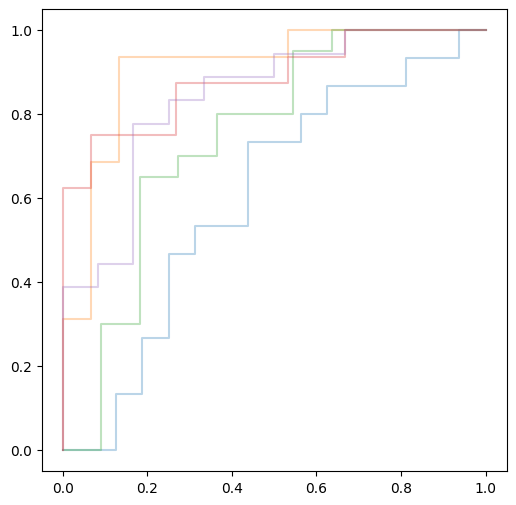

In [36]:
from sklearn.metrics import matthews_corrcoef
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Configure the cross-validation procedure
cv_outer = KFold(n_splits=5, shuffle=True, random_state=1)

# Initialize lists to store results
acc_results_s = []
precision_results_s = []
F1_results_s = []
recall_results_s = []
aucroc_results_s = []
mcc_results_s = []
aucs_s = []

# Store probability predictions and true labels here
fig, ax = plt.subplots(figsize=(6, 6))

y_prob_all_SVM = []

selected_features_list = []
best_params_list = []
cross_val_scores_list = []

# Calibration
svm_kfold_probability = []
kfold_true_label_svm = []

fold = 0

mean_fpr_s_s = np.linspace(0, 1, 100)

for train_ix, test_ix in cv_outer.split(X_s):
    # Split data
    X_train, X_test = X_s[train_ix], X_s[test_ix]
    y_train, y_test = y_s[train_ix], y_s[test_ix]
    fold += 1
    
    # Configure the cross-validation procedure
    cv_inner = KFold(n_splits=3, shuffle=True, random_state=1)
    
    # Feature selection
    model_rfc = rfc.fit(X_train, y_train)
    feature_importances = model_rfc.feature_importances_
    selected_features = np.where(feature_importances > 0.01)[0]  # Set a threshold for feature selection
    selected_features_list.append(selected_features)
    
    # Subset the features in the training and test sets
    X_train_fs = X_train[:, selected_features]
    X_test_fs = X_test[:, selected_features]
    
    # Define the model with default hyperparameters
    model = SVC(kernel='rbf', class_weight='balanced', probability=True)
    
    # Define the grid of values to search
    param_grid = {'C': [1e-10, 1e-5, 1e-3, 1e-2, 0.1, 1, 1e1, 1e2, 1e3, 5e3, 1e4, 5e4, 1e5],
                  'gamma': [1e-6, 1e-5, 1e-4, 0.001, 0.005, 0.01, 0.1, 1, 10, 100]}
    
    # Define search
    search_s = GridSearchCV(model, param_grid, scoring='accuracy', cv=cv_inner, refit=True)
    
    # Execute the grid search
    result_s = search_s.fit(X_train_fs, y_train)
    best_model_s = result_s.best_estimator_
    
    # Evaluate model on the hold-out dataset
    probas_svc = best_model_s.predict_proba(X_test_fs)
    y_pred_s = best_model_s.predict_proba(X_test_fs)[:, 1]
    
    # Compute and plot ROC curve
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_s)
    tprs.append(np.interp(mean_fpr_s_s, fpr, tpr))
    roc_auc = auc(fpr, tpr)
    aucs_s.append(roc_auc)
    plt.plot(fpr, tpr, lw=1.5, alpha=0.3, label='ROC fold %d (AUC = %0.2f)' % (fold, roc_auc))
    
    yhat_s = best_model_s.predict(X_test_fs)
    
    # Evaluate the model
    acc_s = accuracy_score(y_test, yhat_s)
    precision_s = precision_score(y_test, yhat_s)
    recall_s = recall_score(y_test, yhat_s)
    f1_s = f1_score(y_test, yhat_s)
    mcc_s = matthews_corrcoef(y_test, yhat_s)
    auc_s = metrics.roc_auc_score(y_test, probas_svc[:, 1])
    
    # Calibration
    svm_kfold_probability.append(probas_svc[:, 1])
    kfold_true_label_svm.append(y_test)
    
    # Store the result
    acc_results_s.append(acc_s)
    precision_results_s.append(precision_s)
    F1_results_s.append(f1_s)
    recall_results_s.append(recall_s)
    aucroc_results_s.append(auc_s)
    mcc_results_s.append(mcc_s)
    
    # Report progress
    print('>acc=%.3f, est=%.3f, cfg=%s' % (acc_s, result_s.best_score_, result_s.best_params_))

# Plot the mean ROC curve across all folds
mean_tpr_s_s = np.mean(tprs, axis=0)
mean_auc_s_s = auc(mean_fpr_s_s, mean_tpr_s_s)
std_auc_s_s = np.std(aucs_s)

# Summarize the estimated performance of the model
print('Accuracy: %.3f (%.3f)' % (mean(acc_results_s), std(acc_results_s)))
print('Precision: %.3f (%.3f)' % (mean(precision_results_s), std(precision_results_s)))
print('F1_Score: %.3f (%.3f)' % (mean(F1_results_s), std(F1_results_s)))
print('Recall: %.3f (%.3f)' % (mean(recall_results_s), std(recall_results_s)))
print('AUC_ROC: %.3f (%.3f)' % (mean_auc_s_s, std(aucroc_results_s)))
print('MCC: %.3f (%.3f)' % (mean(mcc_results_s), std(mcc_results_s)))

# Prepare the DataFrame for results
data_svm_s = pd.DataFrame(data=[['SVM',
                                 '%.3f (%.3f)' % (mean(acc_results_s), std(acc_results_s)),
                                 '%.3f (%.3f)' % (mean(aucroc_results_s), std(aucroc_results_s)),
                                 '%.3f (%.3f)' % (mean(F1_results_s), std(F1_results_s)),
                                 '%.3f (%.3f)' % (mean(mcc_results_s), std(mcc_results_s))]],
                          columns=['Classifier', 'Accuracy', 'AUC-ROC', 'F1 score', 'MCC'])
data_classifier_s = pd.concat([data_classifier_s, data_svm_s], ignore_index=True)

# Plot the mean ROC curve across all folds
mean_tpr_s_s = np.mean(tprs, axis=0)
mean_auc_s_s = auc(mean_fpr_s_s, mean_tpr_s_s)
std_auc_s_s = np.std(aucs_s)

plt.plot(mean_fpr_s_s, mean_tpr_s_s, color='b', label=r"Mean ROC (AUC = %0.2f $\pm$ %0.2f)" % (mean_auc_s_s, std_auc_s_s), lw=2, alpha=.8)

# Plot the chance line
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r', alpha=.8)

# Finalize the plot
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Nested Cross-Validation ROC Curve for SVM Classifier')
plt.legend(loc="lower right")
plt.savefig('roc_svm_s', dpi=300)

plt.show()


#Random Forest

>acc=0.677, est=0.837, cfg={'criterion': 'gini', 'max_depth': 3, 'max_features': 'sqrt', 'n_estimators': 10}
>acc=0.806, est=0.821, cfg={'criterion': 'gini', 'max_depth': 3, 'max_features': 'sqrt', 'n_estimators': 100}
>acc=0.774, est=0.837, cfg={'criterion': 'gini', 'max_depth': 4, 'max_features': 'sqrt', 'n_estimators': 100}
>acc=0.806, est=0.829, cfg={'criterion': 'gini', 'max_depth': 3, 'max_features': 'sqrt', 'n_estimators': 100}
>acc=0.800, est=0.822, cfg={'criterion': 'entropy', 'max_depth': 2, 'max_features': 'sqrt', 'n_estimators': 100}
Accuracy: 0.773 (0.049)
Precision: 0.780 (0.099)
F1_Score: 0.802 (0.045)
Recall: 0.847 (0.096)
MCC: 0.553 (0.091)
AUC_ROC: 0.862 (0.069)


NameError: name 'data_classifier_s' is not defined

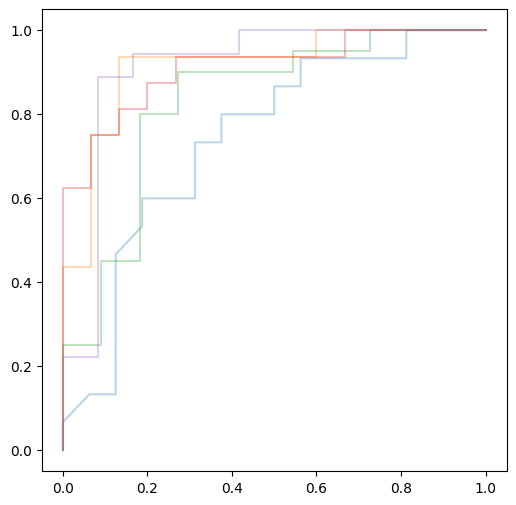

In [38]:
# configure the cross-validation procedure
cv_outer = KFold(n_splits=5, shuffle=True, random_state=1)

# enumerate splits
acc_results_r = list()
precision_results_r = list()
F1_results_r = list()
recall_results_r = list()
mcc_results_r = list()  # List to store MCC results
aucroc_results_r = list()
aucs_r = list()
## save all crossvalidation results and then take the average of all of my data to make the calibration plot.
# store probability predictions and true labels here
r_kfold_probability = []
kfold_true_label_r = []

fig, ax = plt.subplots(figsize=(6, 6))
fold = 0

mean_fpr_r_s = np.linspace(0, 1, 100)

for train_ix, test_ix in cv_outer.split(X_s):
    # split data
    X_train, X_test = X_s[train_ix, :], X_s[test_ix, :]
    y_train, y_test = y_s[train_ix], y_s[test_ix]
    # configure the cross-validation procedure
    cv_inner = KFold(n_splits=3, shuffle=True, random_state=1)
    fold += 1
   
    # feature selection
    model_rfc = rfc.fit(X_train, y_train)
    feature_importances = rfc.feature_importances_
    selected_features = np.where(feature_importances > 0.01)[0]  # set a threshold for feature selection
    selected_features_list.append(selected_features)
   
    # subset the features in the training and test sets
    X_train_fs = X_train[:, selected_features]
    X_test_fs = X_test[:, selected_features]
    
    # define the model with default hyperparameters
    model = RandomForestClassifier(random_state=22)
    
    # define the grid of values to search
    param_grid = { 
        'n_estimators': [1, 10, 100],
        'max_features': ['sqrt', 'log2'],
        'max_depth': [1, 2, 3, 4],
        'criterion': ['gini', 'entropy']
    }
    
    # define search
    search = GridSearchCV(model, param_grid, scoring='accuracy', cv=cv_inner, refit=True)
    
    result = search.fit(X_train_fs, y_train)
    best_model = result.best_estimator_
    
    y_pred_r = best_model.predict_proba(X_test_fs)[:, 1]
    
    # Compute and plot ROC curve
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_r)
    tprs.append(np.interp(mean_fpr_r_s, fpr, tpr))
    roc_auc = auc(fpr, tpr)
    aucs_r.append(roc_auc)
    plt.plot(fpr, tpr, lw=1.5, alpha=0.3, label='ROC fold %d (AUC = %0.2f)' % (fold, roc_auc))
    
    probas_r = best_model.predict_proba(X_test_fs)
    yhat_r = best_model.predict(X_test_fs)
    
    # evaluate the model
    acc_r = accuracy_score(y_test, yhat_r)
    precision_r = precision_score(y_test, yhat_r)
    recall_r = recall_score(y_test, yhat_r)
    f1_r = f1_score(y_test, yhat_r)
    mcc_r = matthews_corrcoef(y_test, yhat_r)  # Calculate MCC
    
    auc_r = metrics.roc_auc_score(y_test, probas_r[:, 1])
    
    # store the result
    acc_results_r.append(acc_r)
    precision_results_r.append(precision_r)
    F1_results_r.append(f1_r)
    recall_results_r.append(recall_r)
    mcc_results_r.append(mcc_r)  # Store MCC result
    aucroc_results_r.append(auc_r)
    
    r_kfold_probability.append(probas_r[:, 1])
    kfold_true_label_r.append(y_test)
    
    # report progress
    print('>acc=%.3f, est=%.3f, cfg=%s' % (acc_r, result.best_score_, result.best_params_))
    
# summarize the estimated performance of the model
print('Accuracy: %.3f (%.3f)' % (np.mean(acc_results_r), np.std(acc_results_r)))
print('Precision: %.3f (%.3f)' % (np.mean(precision_results_r), np.std(precision_results_r)))
print('F1_Score: %.3f (%.3f)' % (np.mean(F1_results_r), np.std(F1_results_r)))
print('Recall: %.3f (%.3f)' % (np.mean(recall_results_r), np.std(recall_results_r)))
print('MCC: %.3f (%.3f)' % (np.mean(mcc_results_r), np.std(mcc_results_r)))  # Print MCC result
print('AUC_ROC: %.3f (%.3f)' % (np.mean(aucroc_results_r), np.std(aucroc_results_r)))

all_scores_rf = {
    "Accuracy": acc_results_r,
    'AUC-ROC': aucroc_results_r,
    'F1-Score': F1_results_r,
    'MCC': mcc_results_r,  # Include MCC in the results DataFrame
    'Classifier': 'Random Forest'
}
all_scores_rf = pd.DataFrame(all_scores_rf)

# Prepare the DataFrame for results
data_rf_s = pd.DataFrame(data=[['Random Forest',
                                 '%.3f (%.3f)' % (mean(acc_results_r), std(acc_results_r)),
                                 '%.3f (%.3f)' % (mean(aucroc_results_r), std(aucroc_results_r)),
                                 '%.3f (%.3f)' % (mean(F1_results_r), std(F1_results_r)),
                                 '%.3f (%.3f)' % (mean(mcc_results_r), std(mcc_results_r))]],
                          columns=['Classifier', 'Accuracy', 'AUC-ROC', 'F1 score', 'MCC'])
data_classifier_s = pd.concat([data_classifier_s, data_rf_s], ignore_index=True)

# Plot the mean ROC curve across all folds
mean_tpr_r_s = np.mean(tprs, axis=0)
mean_auc_r_s = auc(mean_fpr_r_s, mean_tpr_r_s)
std_auc_r = np.std(aucs_r)

plt.plot(mean_fpr_r_s, mean_tpr_r_s, color='b', label=r"Mean ROC (AUC = %0.2f $\pm$ %0.2f)" % (mean_auc_r_s, std_auc_r), lw=2, alpha=.8)

# Plot the chance line
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r', alpha=.8)

# Finalize the plot
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Nested Cross-Validation ROC Curve for Random Forest Classifier')
plt.legend(loc="lower right")
plt.savefig('roc_Randomforest', dpi=300)

plt.show()


# XGBoost

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold, GridSearchCV
from sklearn.metrics import roc_curve, auc, accuracy_score, precision_score, recall_score, f1_score, matthews_corrcoef
from xgboost import XGBClassifier
import shap



# Configure the cross-validation procedure
cv_outer = KFold(n_splits=5, shuffle=True, random_state=1)

# Initialize lists to store results
acc_results_x = []
precision_results_x = []
F1_results_x = []
recall_results_x = []
aucroc_results_x = []
mcc_results_x = []
aucs_x = []
tprs = []
selected_features_list = []

# Store probability predictions and true labels here
x_kfold_probability = []
kfold_true_label_x = []

fig, ax = plt.subplots(figsize=(6, 6))

fold = 0
iter_shap = 0
indices = []
df_avg_train = []
df_avg_test = []

mean_fpr_x = np.linspace(0, 1, 100)

# Optimal threshold
optimal_threshold = 0.5  # You might want to optimize this further

for train_ix, test_ix in cv_outer.split(X_s):
     # split data
    X_train, X_test = X_s[train_ix, :], X_s[test_ix, :]
    y_train, y_test = y_s[train_ix], y_s[test_ix]
    # configure the cross-validation procedure
    cv_inner = KFold(n_splits=3, shuffle=True, random_state=1)
    fold += 1
    
    # Feature selection
    model_rfc = RandomForestClassifier(random_state=42).fit(X_train, y_train)
    feature_importances = model_rfc.feature_importances_
    selected_features = np.where(feature_importances > 0.01)[0]  # Set a threshold for feature selection
    selected_features_list.append(selected_features)
   
    # Subset the features in the training and test sets
    X_train_fs = X_train[:, selected_features]
    X_test_fs = X_test[:, selected_features]
    
    # Define the model with default hyperparameters
    model = XGBClassifier(n_jobs=-1)
    
    # Define the grid of values to search
    param_grid_d = {
        'learning_rate': [0.001, 0.01, 0.1, 0.2, 0.3],
        'max_depth': [3, 5, 7, 9, 11],
        'subsample': [0.6, 0.7, 0.8, 0.9, 1.0],
        'colsample_bytree': [0.6, 0.7, 0.8, 0.9, 1.0],
        'reg_alpha': [0, 0.001, 0.01, 0.1, 0.5],
        'reg_lambda': [0, 0.001, 0.01, 0.1, 0.5],
        'n_estimators': [10, 100, 200, 500]
    }
    param_grid = {
        'min_child_weight': [1, 5, 10],
        'gamma': [0,0.5, 1, 1.5, 2, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5]
    }
    
    # Define search
    search = GridSearchCV(model, param_grid, scoring='accuracy', cv=cv_inner, refit=True)
    
    # Execute the grid search
    result = search.fit(X_train_fs, y_train)
    best_model = result.best_estimator_
    
    y_pred_x = best_model.predict_proba(X_test_fs)[:, 1]
    
    # Compute and plot ROC curve
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_x)
    tprs.append(np.interp(mean_fpr_x, fpr, tpr))
    roc_auc = auc(fpr, tpr)
    aucs_x.append(roc_auc)
    plt.plot(fpr, tpr, lw=1.5, alpha=0.3, label='ROC fold %d (AUC = %0.2f)' % (fold, roc_auc))
    
    # Evaluate model on the hold out dataset
    probas_x = best_model.predict_proba(X_test_fs)

    yhat_x = best_model.predict(X_test_fs)
    
    # Evaluate the model
    acc_x = accuracy_score(y_test, yhat_x)
    precision_x = precision_score(y_test, yhat_x)
    recall_x = recall_score(y_test, yhat_x)
    f1_x = f1_score(y_test, yhat_x)
    
    # Optimize MCC with the threshold
    yhat_x_optimized = (probas_x[:, 1] >= optimal_threshold).astype(int)
    mcc_x = matthews_corrcoef(y_test, yhat_x_optimized)
    
    # Evaluate AUC
    auc_x = metrics.roc_auc_score(y_test, probas_x[:, 1])
    
    ## Calibration
    x_kfold_probability.append(probas_x[:, 1])
    kfold_true_label_x.append(y_test)
    
    # Store the result
    acc_results_x.append(acc_x)
    precision_results_x.append(precision_x)
    recall_results_x.append(recall_x)
    F1_results_x.append(f1_x)
    aucroc_results_x.append(auc_x)
    mcc_results_x.append(mcc_x)
    
    # Report progress
    print('>acc=%.3f, est=%.3f, cfg=%s' % (acc_x, result.best_score_, result.best_params_))
    
    # Defining the SHAP value classifier
    classifier_shap = best_model
    classifier_shap.fit(X_train, y_train)

    # SHAP values for training data
    train_tmp_df = pd.DataFrame(X_train, columns=X.columns)
    explainer = shap.TreeExplainer(classifier_shap, train_tmp_df, feature_perturbation='interventional', model_output='probability')

    # SHAP values for test data
    test_tmp_df = pd.DataFrame(X_test, columns=X.columns)
    test_explainer = shap.TreeExplainer(classifier_shap, test_tmp_df, feature_perturbation='interventional', model_output='probability')

    df_shap_train = pd.DataFrame(explainer.shap_values(train_tmp_df), columns=X.columns)
    df_shap_train["index"] = train_ix
    df_avg_train.append(df_shap_train)

    test_df_shap = pd.DataFrame(test_explainer.shap_values(test_tmp_df), columns=X.columns)
    test_df_shap["index"] = test_ix
    df_avg_test.append(test_df_shap)

    iter_shap += 1


# Summarize the estimated performance of the model
print('Accuracy: %.3f (%.3f)' % (np.mean(acc_results_x), np.std(acc_results_x)))
print('Precision: %.3f (%.3f)' % (np.mean(precision_results_x), np.std(precision_results_x)))
print('F1_Score: %.3f (%.3f)' % (np.mean(F1_results_x), np.std(F1_results_x)))
print('Recall: %.3f (%.3f)' % (np.mean(recall_results_x), np.std(recall_results_x)))
print('AUC_ROC: %.3f (%.3f)' % (np.mean(aucroc_results_x), np.std(aucroc_results_x)))
print('MCC: %.3f (%.3f)' % (np.mean(mcc_results_x), np.std(mcc_results_x)))

# Results
all_scores_x = {
    "Accuracy": acc_results_x,
    'AUC-ROC': aucroc_results_x,
    'F1-Score': F1_results_x,
    'Recall': recall_results_x,
    'Precision': precision_results_x,
    'MCC': mcc_results_x,
    'Classifier': 'XGBoost'
}

all_scores_x = pd.DataFrame(all_scores_x)

# Plot the mean ROC curve across all folds
mean_tpr_x = np.mean(tprs, axis=0)
mean_auc_x = auc(mean_fpr_x, mean_tpr_x)
std_auc_x = np.std(aucs_x)

plt.plot(mean_fpr_x, mean_tpr_x, color='b', label=r"Mean ROC (AUC = %0.2f $\pm$ %0.2f)" % (mean_auc_x, std_auc_x), lw=2, alpha=.8)

# Plot the chance line
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r', alpha=.8)

# Finalize the plot
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Nested Cross-Validation ROC Curve for XGBoost Classifier')
plt.legend(loc="lower right")
plt.savefig('roc_xgboost_s', dpi=300)

plt.show()

# Append new data to data_classifier
data_xgboost_s = pd.DataFrame(data=[['XGBoost',
                                   '%.3f (%.3f)' % (np.mean(acc_results_x), np.std(acc_results_x)),
                                   '%.3f (%.3f)' % (np.mean(aucroc_results_x), np.std(aucroc_results_x)),
                                   '%.3f (%.3f)' % (np.mean(F1_results_x), np.std(F1_results_x)),
                                   '%.3f (%.3f)' % (np.mean(mcc_results_x), np.std(mcc_results_x))]],
                            columns=['Classifier', 'Accuracy', 'AUC-ROC', 'F1 score', 'MCC'])

data_classifier_s = pd.concat([data_classifier_s, data_xgboost_s], ignore_index=True)


In [37]:
data_classifier_s = pd.concat([data_classifier_s, data_xgboost_s], ignore_index=True)


NameError: name 'data_classifier_s' is not defined

In [ ]:
data_classifier_s 
